In [1]:
import axc.pricer
pricer = axc.pricer.Pricer()
returns = pricer.get_returns()
returns

/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:41: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(index, start="2000-01-01", inter

,^GSPC,^RUT,GC=F,^990100-USD-STRD
Date,,,,
2000-02-01,-0.020108,0.164198,NaN,-0.003073
2000-03-01,0.096720,-0.066850,NaN,0.067053
2000-04-01,-0.030796,-0.060918,NaN,-0.034942
2000-05-01,-0.021915,-0.059398,NaN,-0.023359
2000-06-01,0.023934,0.086207,NaN,0.021152
...,...,...,...,...
2025-08-01,0.019066,0.069979,0.054810,0.024951
2025-09-01,0.035324,0.029606,0.105680,0.030878
2025-10-01,0.022687,0.017607,0.036815,0.019435


In [2]:
factors = pricer.get_factors(returns, 3)
factors[0]

,Factor1,Factor2,Factor3
Date,,,
2000-09-01,1.258842,0.068373,0.250317
2000-11-01,1.625061,-1.159199,-0.538280
2000-12-01,-0.194351,0.094482,0.883519
2001-01-01,-0.461443,1.106048,0.184192
2001-02-01,2.069499,-0.408322,0.397085
...,...,...,...
2025-08-01,-0.434221,-0.297328,0.708733
2025-09-01,-0.648351,-0.812547,0.207720
2025-10-01,-0.363997,-0.197896,-0.018297


In [3]:
factors[1]


,Factor1,Factor2,Factor3
^GSPC,-0.986084,0.047672,-0.008541
^RUT,-0.873957,0.120560,0.168514
GC=F,-0.159197,-0.547925,0.143439
^990100-USD-STRD,-0.983448,-0.065485,-0.013435


/mnt/data/shared/axc-backtesting/notebooks/axc/pricer.py:76: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df[cols[0]], df[cols[1]], df[cols[2]], cmap="viridis")


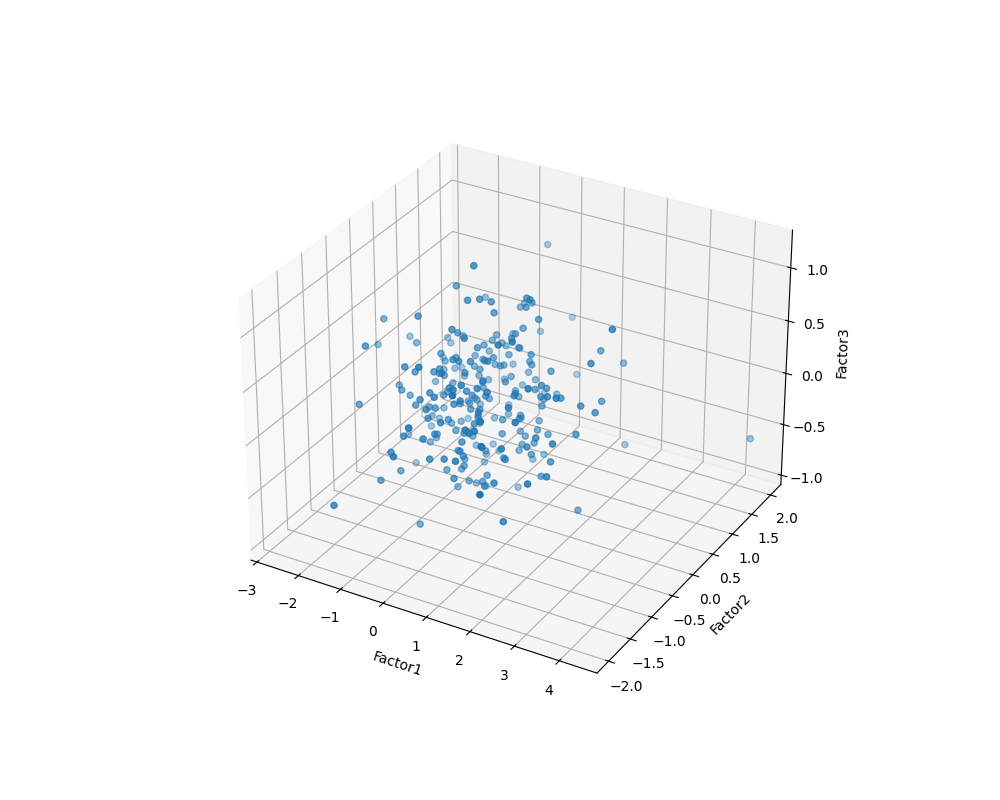

In [4]:
%matplotlib widget
axc.pricer.plot_scatter_3d(factors[0], ['Factor1', 'Factor2', 'Factor3'])

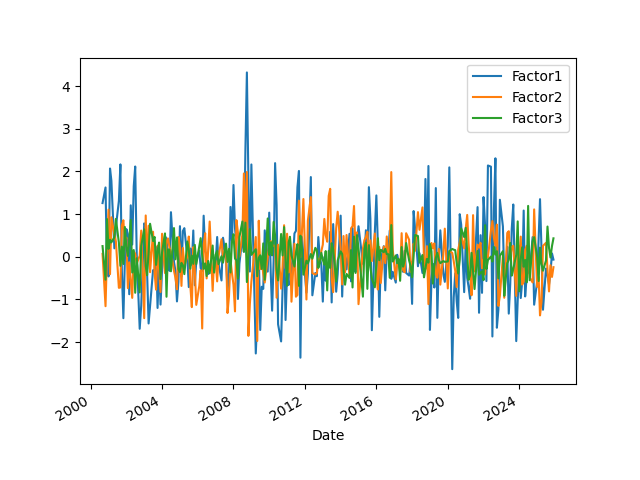

In [5]:
axc.pricer.plot_factors(factors[0])